In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix


In [7]:
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"

data = pd.read_csv(URL1)
X = pd.read_csv(URL2)


In [9]:
print(data.head())
print(X.head())


   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

In [ ]:
#1-Create the Target Array

In [11]:
Y = data['Class'].to_numpy()

In [ ]:
#2-Standardize the Features

In [13]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [19]:
#3-Train/Test Split

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=2)
print(X_test.shape)   # Check the shape of your test set


(18, 83)


In [23]:
#4-Logistic Regression & GridSearchCV

In [21]:
parameters = {
    'C': [0.01, 0.1, 1],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}
logreg_cv = GridSearchCV(LogisticRegression(), parameters, cv=10)
logreg_cv.fit(X_train, Y_train)
print("Best Params:", logreg_cv.best_params_)
print("Best Score:", logreg_cv.best_score_)


Best Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.8464285714285713


In [25]:
#5-Accuracy & Confusion Matrix (Logistic Regression)

In [27]:
print("Test set score:", logreg_cv.score(X_test, Y_test))


Test set score: 0.8333333333333334


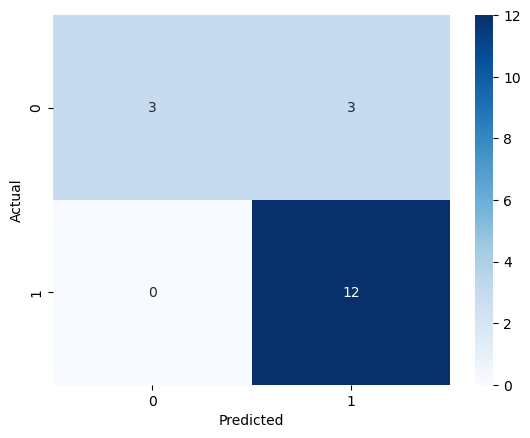

In [29]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

yhat_logreg = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_logreg)


In [31]:
#6-SVM & GridSearchCV

In [33]:
parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [1, 10],
    'gamma': [0.1, 1]
}
svm_cv = GridSearchCV(SVC(), parameters, cv=10)
svm_cv.fit(X_train, Y_train)
print("Best Params:", svm_cv.best_params_)
print("Best Score:", svm_cv.best_score_)


Best Params: {'C': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}
Best Score: 0.8339285714285714


In [35]:
#7-SVM Accuracy

Test set score: 0.8333333333333334


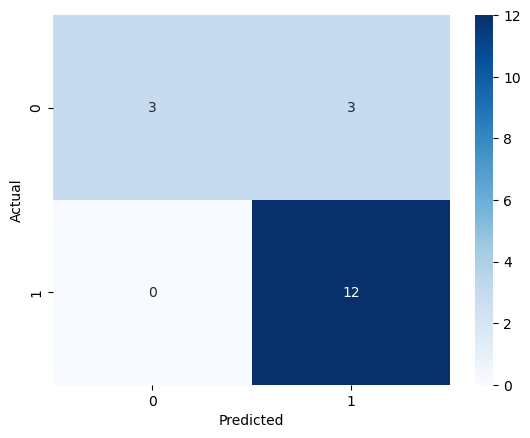

In [37]:
print("Test set score:", svm_cv.score(X_test, Y_test))
yhat_svm = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_svm)


In [ ]:
#8-Decision Tree & GridSearchCV

In [39]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4]
}
tree_cv = GridSearchCV(DecisionTreeClassifier(), parameters, cv=10)
tree_cv.fit(X_train, Y_train)
print("Best Params:", tree_cv.best_params_)
print("Best Score:", tree_cv.best_score_)


Best Params: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4}
Best Score: 0.8714285714285713


In [ ]:
#9-Decision Tree Accuracy

Test set score: 0.8333333333333334


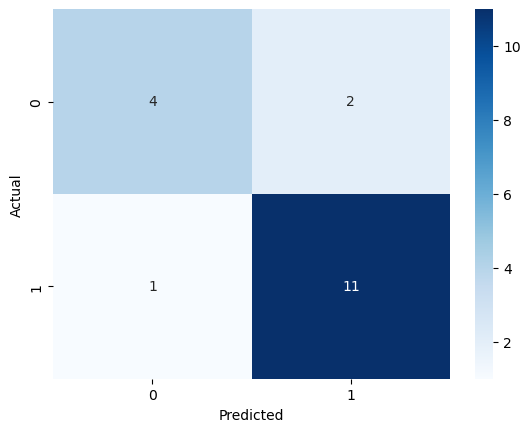

In [41]:
print("Test set score:", tree_cv.score(X_test, Y_test))
yhat_tree = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_tree)


In [43]:
#10-K-Nearest Neighbors & GridSearchCV

In [45]:
parameters = {
    'n_neighbors': [3, 5, 7, 9],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
knn_cv = GridSearchCV(KNeighborsClassifier(), parameters, cv=10)
knn_cv.fit(X_train, Y_train)
print("Best Params:", knn_cv.best_params_)
print("Best Score:", knn_cv.best_score_)


Best Params: {'algorithm': 'auto', 'n_neighbors': 3}
Best Score: 0.7785714285714285


In [ ]:
#11-KNN Accuracy

Test set score: 0.7777777777777778


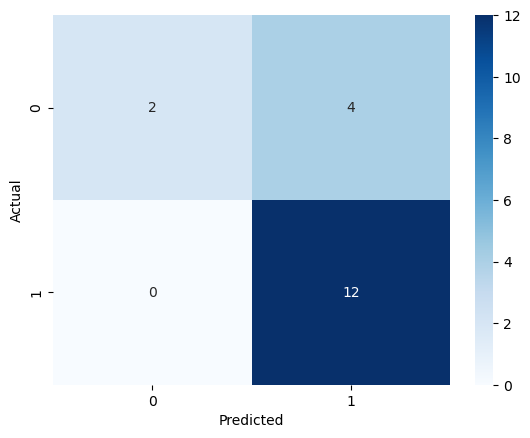

In [47]:
print("Test set score:", knn_cv.score(X_test, Y_test))
yhat_knn = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_knn)


In [53]:
#12- Find the Best Method

### The best performing methods for predicting SpaceX Falcon 9 first stage landing success, based on this dataset and your testing, are Logistic Regression, SVM, and Decision Tree, all achieving a test accuracy of 83.33%. KNN performed slightly worse.